# Teoremas "límite" de la Estadística: Ley de los Grandes Números (LLN: Large Numbers Law) (1)

## Introducción

Cuando hablamos de estadística y de eventos aleatorios la intuición nos dice que cuanto más realicemos el experimento más a salvo estaremos de situaciones "anómalas" aparentemente irracionales.

Si disponemos de una moneda y la lanzamos al aire sabemos que (¡siempre que sea una moneda "fiel"!) tanto la cara como la cruz disponen de una probabilidad del 50% de que ocurran. Pero también hemos sufrido, o disfrutado, en repeticiones de este experimiento, rachas de varias caras o varias cruces de manera consecutiva. Esta situación es improbable?: Sí, según la longitud de la racha!, pero es imposible? No, en absoluto. La intuición nos dice que a larga, y con un número suficiente de repeticiones del experimiento, llegaremos a una media igual a la teórica: 1/2, o 50% de caras y 50% de cruces.

He escrito este posts para explicar estos conceptos por medio de dos teóremas fundamentales de la Estadística: La Ley de los Grandes Números y el Teorema del Límite Central. En este post hablaremos del primero.

Vamos a basarnos en distribuciones Binomiales, de Bernouilli, en este trabajo.Veremos brevemente estas dos distribuciones, y además introduciremos el Teorema de Markov y el Teorema de Chebyshev, necesarios para la demostración de los Teoremas protagonistas de este post.

## Distribución de Bernouilli

Es esta una distribución de probabilidad de una variable aleatoria en la que definimos un éxito, $valor=1$,  con una probabilidad $p$ y un fracaso, $valor=0$, con probabilidad $q=1-p$. Caso práctico es el mencionado en la Introducción, en el caso de que la moneda sea fiel tendremos una Distribución de Bernouilli con $p=1/2$. 

Calculemos el valor esperado y la varianza de esta distribución, usaremos estos valores posteriormente:

$E[X]=\sum_x x*p(x)=1*p+0*q=p $

$Var[X]=|E[X^2]\,-E[X]^2|=1^2p+0*q-pp=p-p^2=p(1-p)$


 ## Distribución binomial

En el caso de que repitamos experimentos basados en la distribución anterior nos encontraremos con una distribución binomial. 

La caracterizaremos por un valor $p$, probabilidad de éxito, y un valor $n$, número de experimentos realizados. Formalmente una variable aleatoria con distribución binomial la representaremos tal que $X\sim B(n,p)$. $X$ marca el número de éxitos tras los $n$ intentos o experimentos.

La función de densidad de probabilidad es:

$f(x)={n\choose k} p^k  (1-p)^{n-k}$, con $k\in\{0..n\}$

y con un valor esperado $E(X)=np$ y una varianza $V(X)=np(1-p)$

## Desigualdad de Markov

La desigualdad de Markov nos dice que siendo $X$ una variable aleatoria, con valores siempre mayor o igual que cero, entonces:

$P(X\geq a)\leq \dfrac {E[X]}{a} \;  \forall a > 0$ 

Veamos una rápida demostración. Para ello definimos una variable auxiliar $I$, tal que:
$
I=\left\{
                \begin{array}{ll}
                  1 \; si X \geq a\\
                  0 \;resto
                \end{array}
              \right.
$ lo cual implica que $I \leq \dfrac{X}{a} $. Aplicamos ahora valor esperado a ambos lados:
$E[I] \leq \dfrac {E[X]}{a}$, y aplicando la definición de valor esperado: $E[\mathrm{X}]=\sum _{x\in \mathrm{X}} x*p(x)=1*p(X\geq a) + 0*p(X<a)$ luego $E[I]=p(X \geq a)$ luego $p(X\geq a) \leq \dfrac {E[X]}{a}$ $\blacksquare$

## Desigualdad de Chebyshev´s

Esta desigualdad nos dice que siendo $X$ una variable aleatoria con una media finita $\mu$ y una varianza $\sigma^2$, entonces $\forall k >0$ : 

$p\left(\left| x-\mu \right| \geq k\right) \leq \dfrac {\sigma^2}{k^2}$

Efectivamente, si aplicamos $Markov$ con $k^2=a$ entonces: 

$p\left\{(x-\mu)^2\geq k^2  \right\}\leq\dfrac{E\left[(x-\mu)^2\right]}{k^2}$ y de ahí se infiere que: 
$p\left\{(x-\mu)\geq k  \right\}\leq\dfrac{\sigma^2}{k^2}$  $\blacksquare$

## Ley "débil" de los Grandes Números

Esta desigualdad nos dice que siendo $X_1, X_2,\cdots,X_n$ variables 
aleatorias independientes e idénticamente distribuidas (nos referiremos a este hecho como $i.i.d.$) con media finita $\mathrm{E}\left[x_i\right]=\mu$ y varianza finita $\sigma^2$, entonces $\forall \epsilon >0$ se cumple que  $p\left\{\left| \dfrac {x_1+\cdots+x_n}{n} - \mu\right| \geq \epsilon\right\} \rightarrow 0$ cuando $n\rightarrow \infty$. Esta ley nos indica, de manera resumida, que la media de las estimaciones de una variable $X$ tiende a la media de esa variable.

Para probar este teorema partimos del hecho de que $\mathrm{E}\left[\dfrac{X_1+\cdots+X_n}{n}\right]=n\mu/n=\mu$ y que $Var\left(\dfrac{X_1+\cdots+X_n}{n}\right)=\dfrac{\sigma^2}{n}$ (ambos se extraen de las definiciones de valor esperado y varianza), y podemos aplicar la desigualdad de Chebyshev tal que:

$$
p\left\{\left|\dfrac{X_1+\cdots+X_n}{n}\right|-\mu)\geq \epsilon \right\}\leq\dfrac{\sigma^2}{nk^2}$$ y como $n\rightarrow\infty$ entonces el término de la derecha tiende a cero con lo que queda demostrado.

Hemos visto aquí el primero de los tres teoremas, nos demuestra lo que de manera intuitiva entendemos: la media de los valores estimados de una variable se acercará a la media teórica de esa variable aleatoria cuanto más valores estimemos.


## Juguemos con Python y con estos conceptos 

Vamos a realizar simulaciones y comprobar como se cumplen el resultado previsto en el LLN.

Para ello jugaremos con las librerías scipy, para las herramientas estadísticas, y la clásica matplotlib para los gráficos.

Empecemos con la importación:

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

Jugaremos con las dos distribuciones que hemos visto en el comienzo de este artículo: la de Bernouilli y su repetición: la Binomial. Nos basaremos en la función [np.random.binomial](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.binomial.html)

In [24]:
p=q=1/2
valor1=np.random.binomial(1,p,1)
valor2=np.random.binomial(1,p,1)
print ('valor1={} y valor2={}'.format(valor1,valor2))

valor1=[0] y valor2=[1]


Estos dos son ejemplos de Bernouilli, realizamos el experimento de "lanzamiento de moneda" (hemos elegido una $p=1/2$) una sola vez.

Podemos también realizar ese experimento n veces y ver la media:

In [30]:
valor3=np.random.binomial(n=10,p=p,size=1)
print (valor3)

[5]


En este caso vemos el sumatorio de los n experimentos (un nº entre 0 y 10), si lo dividimos entre n obtendremos la media de esos experimentos que será un número entre 0 y 1:

In [34]:
n=10
valor4=np.random.binomial(n=n,p=p,size=1)/n
print (valor4)

[0.3]


Repitamoslo varias veces:

In [39]:
n=10
for i in range(5):
    valor4=np.random.binomial(n=n,p=p,size=1)/n
    print (valor4)

[0.8]
[0.6]
[0.3]
[0.4]
[0.6]


Esta misma repetición la podemos conseguir de manera más simple con el parámetro size. Obtendremos un array de numpy de dimensiones (size,)

In [46]:
valor5=np.random.binomial(n=n,p=p,size=5)/n
print (valor5)

[0.5 0.3 0.6 0.4 0.7]


Ya tenemos entonces un método para hacer simulación de sumas de variables aleatorias. Se compondrá de resultados de realizar el experimento 'n' veces, hallando su media si fuera necesarios al dividir por 'n', y realizaremos esa observación 'size' veces. Por ejemplo: el experimento se compone de 50 lanzamientos de una moneda hallando posteriormente la suma de los valores, y realizaremos ese experimento 100 veces.

In [170]:
n=50
valor6=np.random.binomial(n=n,p=p,size=100)
valor6_medios=valor6/n
print (valor6)
print (valor6_medios)

[29 24 23 20 27 23 23 24 30 23 27 22 24 30 24 23 28 22 20 28 27 25 14 19
 19 23 27 29 24 26 25 30 24 27 21 30 25 26 27 28 22 24 23 25 32 22 22 26
 21 25 28 20 31 27 20 27 23 27 21 25 23 20 26 25 26 19 25 26 25 21 27 26
 27 28 29 31 29 29 21 26 26 22 31 28 21 24 25 28 26 24 24 23 27 19 21 28
 24 27 25 27]
[0.58 0.48 0.46 0.4  0.54 0.46 0.46 0.48 0.6  0.46 0.54 0.44 0.48 0.6
 0.48 0.46 0.56 0.44 0.4  0.56 0.54 0.5  0.28 0.38 0.38 0.46 0.54 0.58
 0.48 0.52 0.5  0.6  0.48 0.54 0.42 0.6  0.5  0.52 0.54 0.56 0.44 0.48
 0.46 0.5  0.64 0.44 0.44 0.52 0.42 0.5  0.56 0.4  0.62 0.54 0.4  0.54
 0.46 0.54 0.42 0.5  0.46 0.4  0.52 0.5  0.52 0.38 0.5  0.52 0.5  0.42
 0.54 0.52 0.54 0.56 0.58 0.62 0.58 0.58 0.42 0.52 0.52 0.44 0.62 0.56
 0.42 0.48 0.5  0.56 0.52 0.48 0.48 0.46 0.54 0.38 0.42 0.56 0.48 0.54
 0.5  0.54]


Y podemos calcular la media de esos experimentos y la desviación estándar de los resultados, Frente a unos valores teóricos de media=p*n y varianza=p(1-p)n, según hemos visto 

In [171]:
print ('Valores reales de la muestra: Media={:.2f}, Varianza={:.2f}'.format(valor6.mean(),valor6.std()**2))
print ('Valores teóricos:             Media={:.2f}, Varianza={:.2f}'.format(p*n,p*(1-p)*n))

Valores reales de la muestra: Media=24.90, Varianza=10.81
Valores teóricos:             Media=25.00, Varianza=12.50


De igual manera podemos ver la media y varianza de las medias de las sumas:

In [172]:
print ('Valores reales de la muestra: Media={:.4f}, Varianza={:.5f}'.format(valor6_medios.mean(),
                                                                            valor6_medios.std()**2))
print ('Valores teóricos:             Media={:.4f}, Varianza={:.5f}'.format(p,p*(1-p)/n))

Valores reales de la muestra: Media=0.4980, Varianza=0.00432
Valores teóricos:             Media=0.5000, Varianza=0.00500


En este punto vamos a crear una función que genere este tipo de resultados, le pasaremos como parámetros: nº de términos a sumar (n), la probabilidad p y el nº de observaciones que queremos que nos devuelva. Con la particularidad de que la n (términos a sumar) podrá ser una lista, de tal manera que, de manera fácil, podamos ver la evolución de la media conforme vamos aumentando el nº de sumandos. Esta función `generador_binomial` nos devolverá un diccionario cuyos índices serán cada uno de los elementos de la lista `terminos_a_sumar` y como valores la lista de las observaciones,junto con la varianza teórica, la media y la varianza de las observaciones.

In [180]:
def generador_binomial(terminos_a_sumar,p,numero_de_observ):
    media=[]
    varianza=[]
    series={}
    varianza_base=p*(1-p)      
    var_teorica=[]
    for n in terminos_a_sumar:
        valores=np.random.binomial(n,0.5,numero_de_observ)/n
        media.append(valores.mean())
        var_teorica.append(varianza_base/n)
        varianza.append(valores.std()**2)
        series[n]=valores
    return series,var_teorica,media,varianza

preparemos una lista con varios escenarios: cada nº representa una `n`, número de términos a sumar para calcular posteriormente la media. Usaremos nueve para cuadrar posteriormente los gráficos. A continuación llamaremos a la función, solicitando 1000 observaciones:

In [183]:
lista_terms_sum=[10,50,100,200,300,400,500,1000,10000] #han de ser 9!
#lista_terms_sum=[10,100,500,1000,5000,10000,50000,100000,1000000]
#lista_terms_sum=[10,20,30,40,50,60,70,80,90]
series,var_teorica,media,varianza=generador_binomial(lista_terms_sum,p=1/2,numero_de_observ=1000)

A continuación representaremos gráficamente estas 1000 observaciones, y veremos el efecto del teorema LLN conforme aumentamos el nº de términos en la suma:

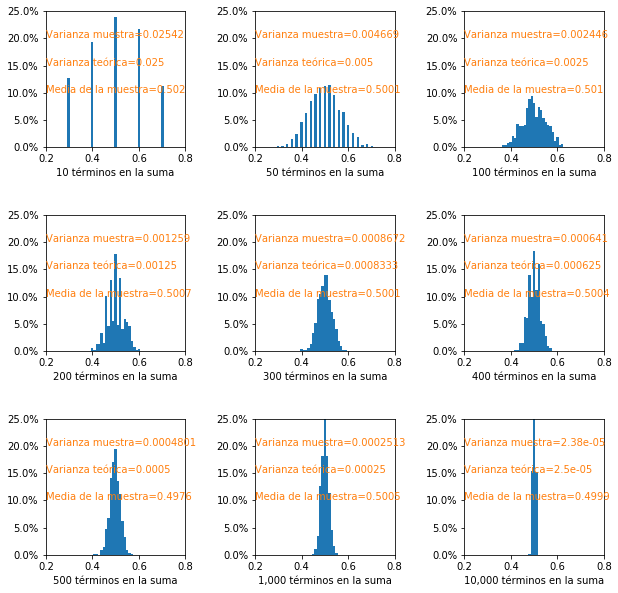

In [184]:
f = plt.figure(figsize=(10,10))
f.subplots_adjust(hspace=1, wspace=1)
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7= f.add_subplot(337)
ax8= f.add_subplot(338)
ax9= f.add_subplot(339)
f.subplots_adjust(hspace=.5, wspace=0.5)
lista_axes=f.get_axes()
N_bins=np.linspace(0,1,100)
n_decimales=2
for i in range(0,9):
    lista_axes[i].set_xlabel('{:,} términos en la suma'.format(lista_terms_sum[i]))
    lista_axes[i].yaxis.set_major_formatter(PercentFormatter(1))
    lista_axes[i].set_xlim(0.2,0.8)
    lista_axes[i].set_ylim(0.0,0.25)
    counts, bins = np.histogram(np.around(series[lista_terms_sum[i]],decimals=n_decimales),bins=N_bins)
    lista_axes[i].hist(bins[:-1],bins,weights=counts/counts.sum())
    lista_axes[i].text(0.0,0.8,'Varianza muestra={:.4}'.
                       format(varianza[i]),transform=lista_axes[i].transAxes,color='tab:orange')
    lista_axes[i].text(0.0,0.6,'Varianza teórica={:.4}'.
                       format(var_teorica[i]),transform=lista_axes[i].transAxes,color='tab:orange')
    lista_axes[i].text(0.0,0.4,'Media de la muestra={:.4}'.
                       format(media[i]),transform=lista_axes[i].transAxes,color='tab:orange')
    

Podemos observar como la varianza disminuye como nos indica la teoría (inversamente proporcial a n) y la media converge a la media de la variable aleatoria inicial. Vemos mejor este efecto con el gráfico siguiente:

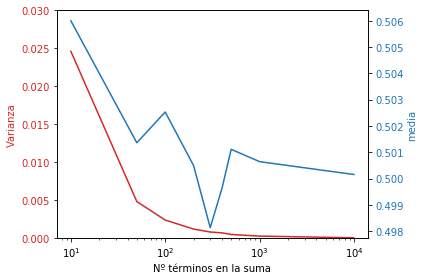

In [10]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xscale('log', basex=10)
ax1.set_xlabel('Nº términos en la suma')
ax1.set_ylabel('Varianza', color=color)
ax1.set_ylim(0,0.03)
ax1.plot(lista_terms_sum,varianza, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('media', color=color)  
ax2.plot(lista_terms_sum,media, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  

## Conclusiones

Hemos visto la base teórica que rigue el comportamiento de variables aleatorias cuando realizas experimentos un número elevado de veces, para, a continuación, realizar simulaciones en `python`, utilizando librerias de uso común, para confirmar que obtenemos resultados alineados con la teoría. En un próximo post veremos el Teorema Central del Límite.